# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [2]:
%run ../tests/test_algorithms.py

C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\tests\test_algorithms.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
........
----------------------------------------------------------------------
Ran 8 tests in 0.095s

OK


In [3]:
%run ../tests/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.041s

OK


In [4]:
%run ../tests/test_predictors.py

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## Running example of the system

In [ ]:
%run ../tools/algorithms.py

In [6]:
%run ../tools/dataloader.py

In [160]:
test = DataLoader('aapl', '2005-02-01', '2018-02-10')

In [161]:
prices = test.get_close()

In [162]:
prices

,Close
Date,
2005-02-01,1.384464
2005-02-02,1.421964
2005-02-03,1.389464
2005-02-04,1.407857
2005-02-07,1.409643
...,...
2018-02-05,39.122501
2018-02-06,40.757500
2018-02-07,39.884998


In [157]:
prices = np.array(prices)
len(prices)

3280

In [ ]:
prices

In [ ]:
%run ../tools/predictors.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [173]:
%run ../tools/predictorsII.py

In [174]:
oo = UnivariatePredictorII(prices, 7)

In [175]:
oo.fit_model(300,"D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[300/300]: 100%|█| 300/300 [00:49<00:00,  6.12it/s, SmoothL1Loss=0.00312, MAE=1.46, RegLoss=0, MAE_val=3.75, Smoot


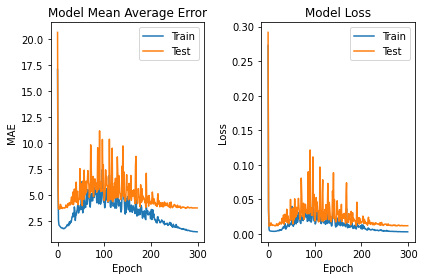

In [176]:
oo.show_performance()

In [177]:
oo.predict()

0    34.245335
1    34.232601
2    36.983940
3    37.010677
4    37.030754
5    37.057564
6    37.052193
Name: yhat1, dtype: float64